In [1]:
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None), name='x')
  w = tf.Variable(2.0, name='weight')
  b = tf.Variable(0.7, name='bias')

  z = w * x + b

  init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session(graph=g) as sess:
  sess.run(init)

  for t in [1.0, 0.6, -1.8]:
    print('x= %4.1f --> z= %4.1f' %(t, sess.run(z, feed_dict={x:t})))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
x=  1.0 --> z=  2.7
x=  0.6 --> z=  1.9
x= -1.8 --> z= -2.9


In [2]:
with tf.compat.v1.Session(graph=g) as sess:
  sess.run(init)
  print(sess.run(z, feed_dict={x:[1., 2., 3.]}))

[2.7 4.7 6.7]


In [3]:
print(z)

Tensor("add:0", dtype=float32)


In [5]:
w = tf.Variable(2.0, name='weight')
b = tf.Variable(0.7, name='bias')

for x in [1.0, 0.6, -1.8]:
  z = w * x + b
  print('x= ', x, ' --> z= ', z)

x=  1.0  --> z=  tf.Tensor(2.7, shape=(), dtype=float32)
x=  0.6  --> z=  tf.Tensor(1.9000001, shape=(), dtype=float32)
x=  -1.8  --> z=  tf.Tensor(-2.8999999, shape=(), dtype=float32)


In [6]:
print(z)

tf.Tensor(-2.8999999, shape=(), dtype=float32)


In [9]:
import tensorflow as tf
import numpy as np

x_array = np.arange(18).reshape(3, 2, 3)
x2 = tf.reshape(x_array, shape=(-1, 6))

xsum = tf.reduce_sum(x2, axis=0)

xmean = tf.reduce_mean(x2, axis=0)

print('input size: ', x_array.shape)
print('changed input: \n', x2.numpy())
print('sum of columns: ', xsum.numpy())
print('avg of columns: ', xmean.numpy())

input size:  (3, 2, 3)
changed input: 
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
sum of columns:  [18 21 24 27 30 33]
avg of columns:  [ 6  7  8  9 10 11]


In [16]:
import tensorflow as tf
import numpy as np
 
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3, 
                    6.6, 7.4, 8.0, 
                    9.0])

In [17]:
class TfLinreg(object):
    def __init__(self, learning_rate=0.01):
        self.w = tf.Variable(tf.zeros(shape=(1)))
        self.b = tf.Variable(tf.zeros(shape=(1)))
        self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
        
    def fit(self, X, y, num_epochs=10):
        training_costs = []
        for step in range(num_epochs):
            with tf.GradientTape() as tape:
                z_net = self.w * X + self.b
                z_net = tf.reshape(z_net, [-1])
                sqr_errors = tf.square(y - z_net)
                mean_cost = tf.reduce_mean(sqr_errors)
            grads = tape.gradient(mean_cost, [self.w, self.b])
            self.optimizer.apply_gradients(zip(grads, [self.w, self.b]))
            training_costs.append(mean_cost.numpy())
        return training_costs
    
    def predict(self, X):
      return self.w * X + self.b

In [18]:
lrmodel = TfLinreg()

In [19]:
training_costs = lrmodel.fit(X_train, y_train)

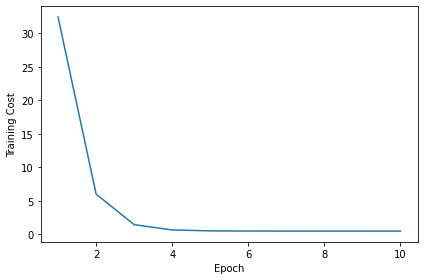

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.tight_layout()
plt.show()

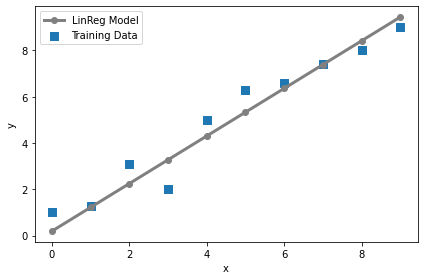

In [21]:
plt.scatter(X_train, y_train, marker='s', s=50, label='Training Data')
plt.plot(range(X_train.shape[0]), 
         lrmodel.predict(X_train),
         color='gray', marker='o', 
         markersize=6, linewidth=3,
         label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()